In this project, we are going to work on some synthetic advertising dataset, indicating whether or not a particular internet user has clicked on an Advertisement.

The goal is to predict if a user would click on an advertisement based on the features of the user.

In the following you can find the description of the features included in the dataset:

    Daily Time Spent on Site: consumer time on site in minutes
    Age: cutomer age in years
    Area Income: Avg. Income of geographical area of consumer
    Daily Internet Usage: Avg. minutes a day consumer is on the internet
    Ad Topic Line: Headline of the advertisement
    City: City of consumer
    Male: Whether or not consumer was male
    Country: Country of consumer
    Timestamp: Time at which consumer clicked on Ad or closed window
    Clicked on Ad: 0 or 1 indicated clicking on Ad

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"E:\Data Science\E. Machine Learning\Projects\Predicting Ad Clicks\advertising.csv")

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.shape

(1000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory Data Analysis

We use some visualizations on the data to extract some insights. Let's first check the distribution on user ages:

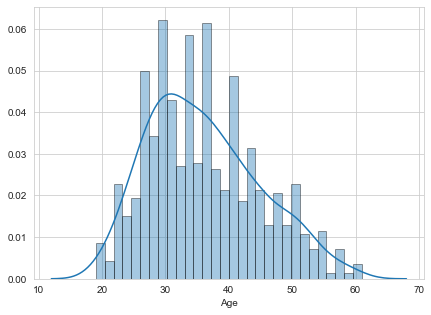

In [7]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.distplot(data['Age'], bins = 30, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CE1172888>,
      dtype=object)

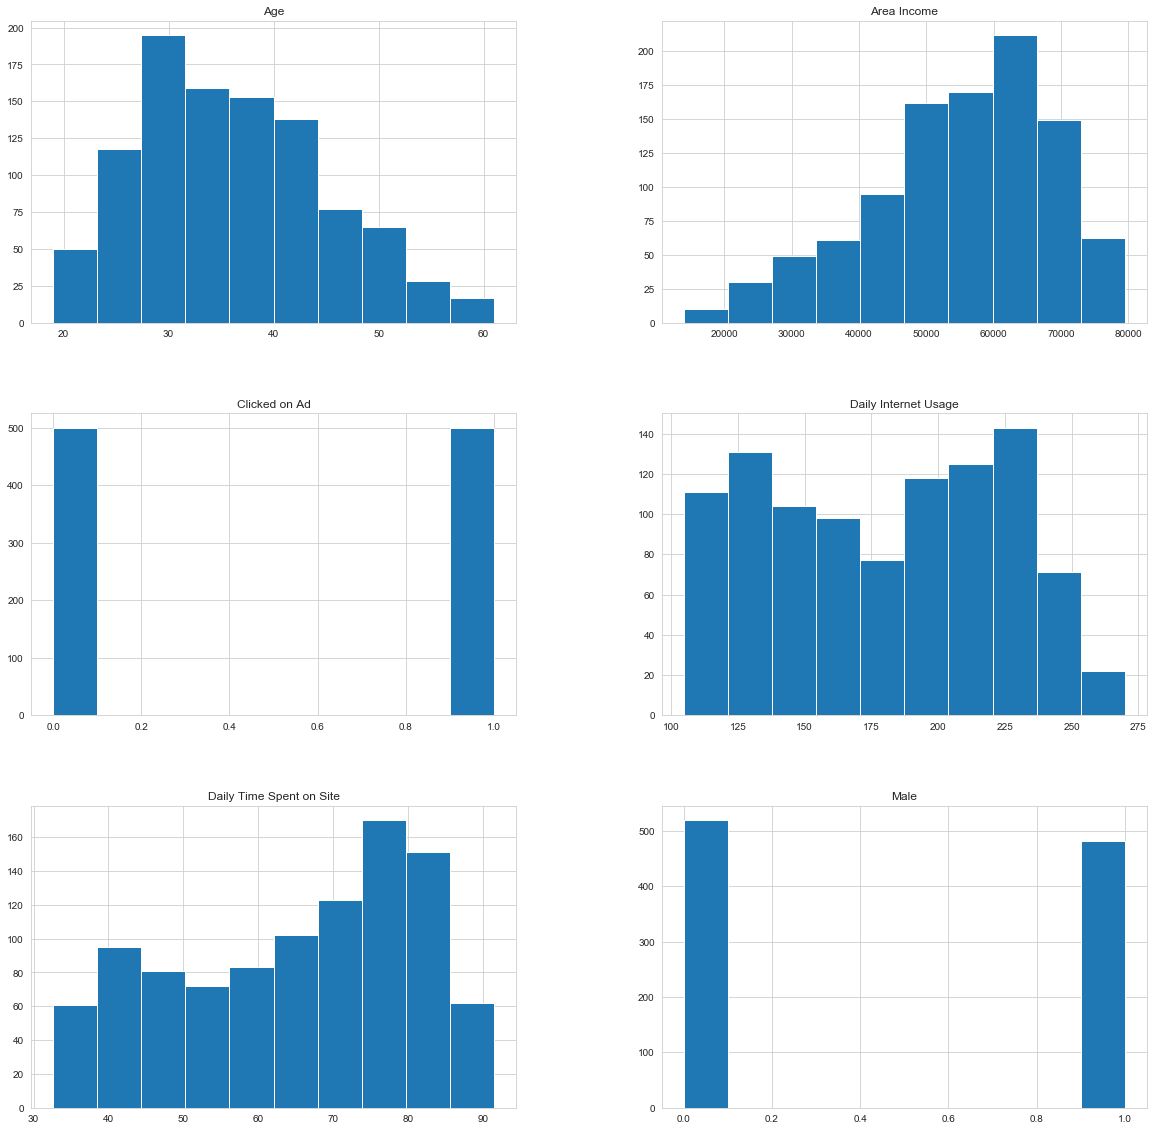

In [9]:
data.hist(figsize=(20,20))

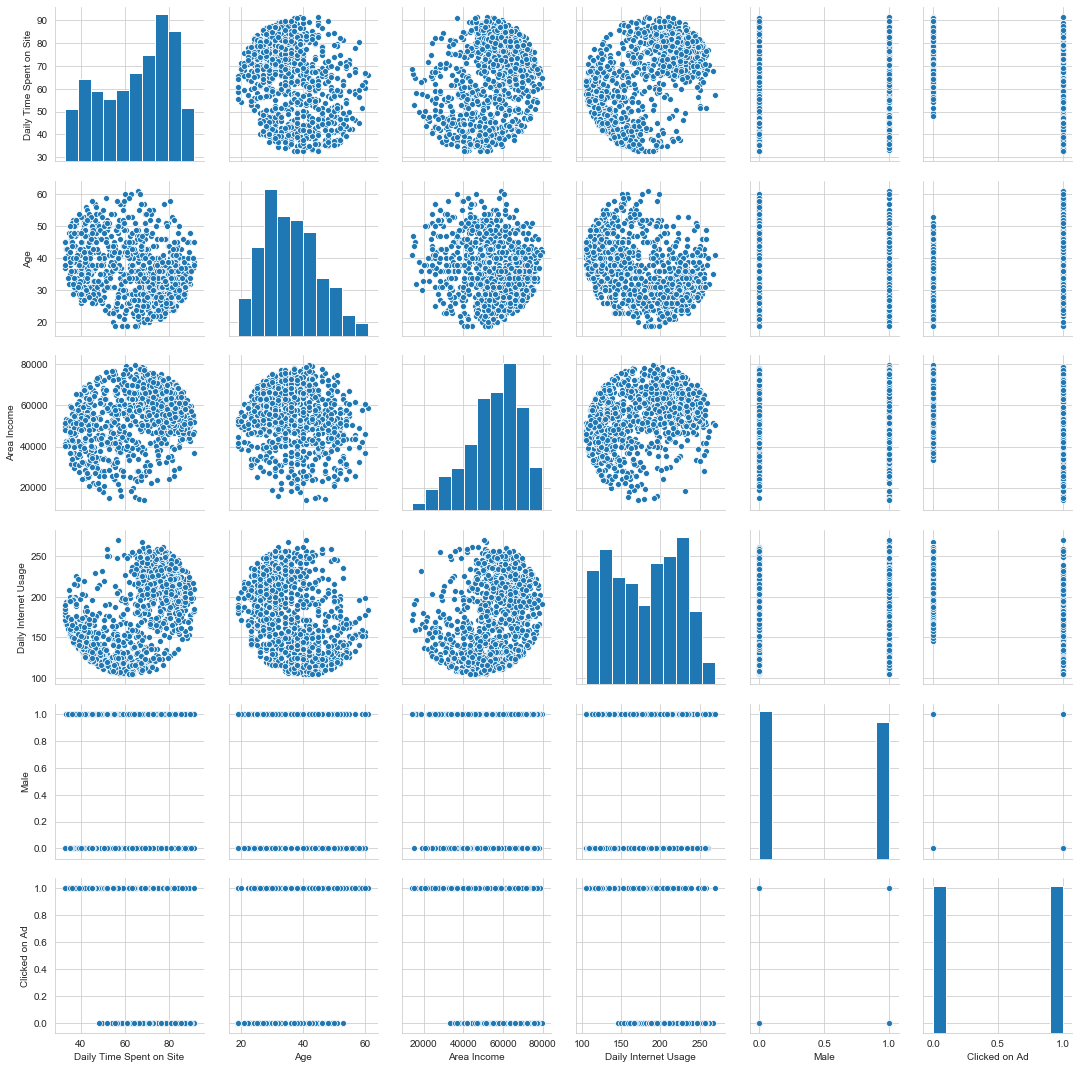

In [10]:
sns.pairplot(data)

We can see that the ages of the internet users in this data set are between 20-60 and they are mostly in their thirties. Let's look at the Area Income versus Age:

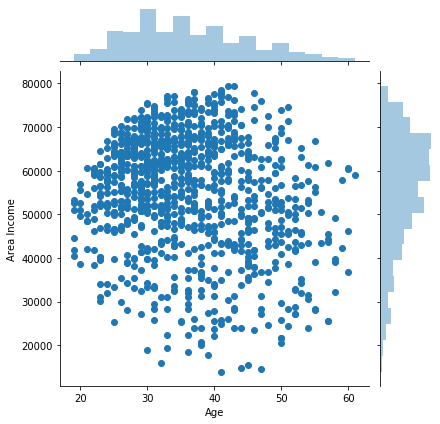

In [3]:
sns.jointplot(x='Age', y='Area Income', data= data)

We also explore the daily time spent on the website versus the age of the users:

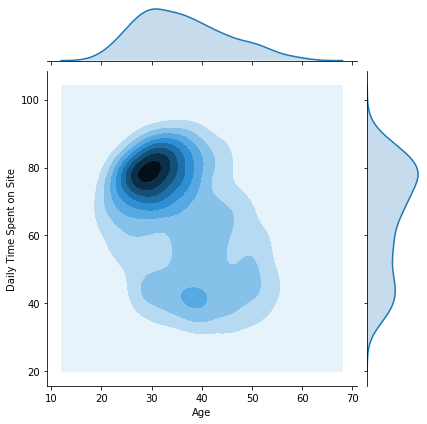

In [4]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= data, kind='kde')

This shows that the younger adults (in the age of 20-40) have spent the most time on the website. However, we should also consider that they have the most population compared to other age groups in the dataset.

Now we want to see the daily time spent on the site versus the total time that the user has spent on the internet:

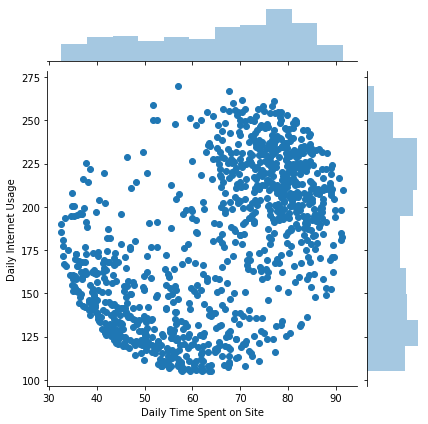

In [5]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data= data)


We can see that the users that spend more time on the internet tend to spend more time on the website too.

Now we take a quick look at the relationship of all the features, considering if they have clicked on the ad or not:

F:\Anaconda\Anaconda_Inst\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda\Anaconda_Inst\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


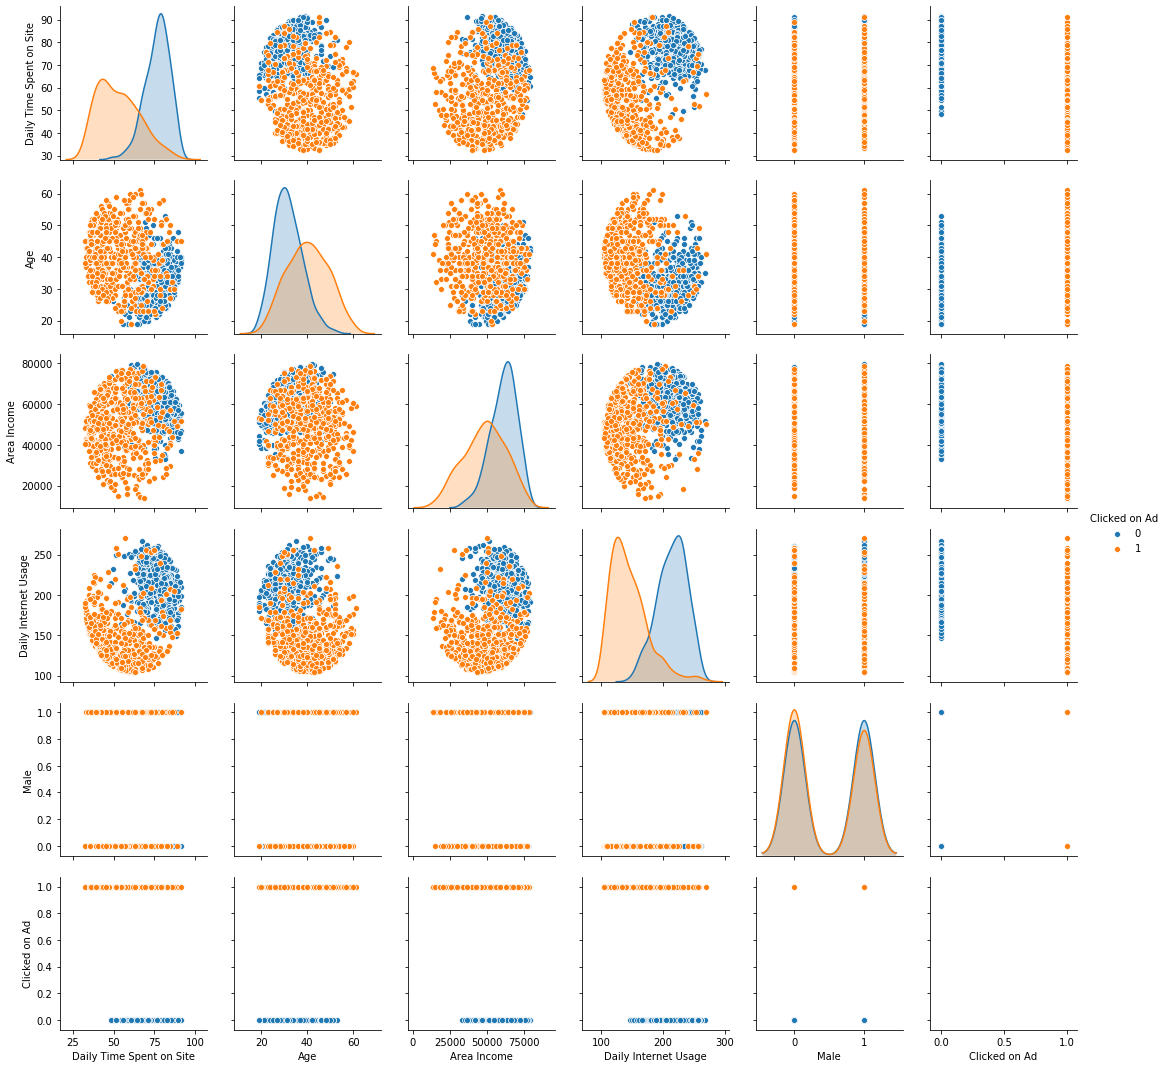

In [6]:
sns.pairplot(data, hue='Clicked on Ad')

### Cleaning the data

We check to see if we have any missing data:

In [7]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

We don't have any missing data as it can be seen in the heatmap.

We have some non-numerical values that we have to manage before using them as inputs of our machine learning algorithm, such as 'Ad Topic Line', 'City', 'Country', 'Timestamp'.

Considering the 'Ad Topic Line' we decide to drop it for now. However, it should be considered that using Natural Language Processing we might get interesting information out of it, if more details about the dataset are provided.

Regarding the 'City' and the 'Country', we can replace them by dummy variables with numerical values, however, in this way we get too many new features.

Another approach would be considering them as categorical values and coding them in one numeric feature.

The 'Timestamp' conversion into numerical values is a bit more complicated. We can consider converting timestampts directly to numbers, or converting them to slots of time/day and see it as a categorical value and then convert it to numerical.

Here we have chosen to take the month and the hour from the timestamp as numerical features.

In [8]:
data['City Codes']= data['City'].astype('category').cat.codes

In [9]:
data['Country Codes'] = data['Country'].astype('category').cat.codes

In [10]:
data[['City Codes','Country Codes']].head(3)

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184


In [11]:
data['Month'] = data['Timestamp'].apply(lambda x: x.split('-')[1])
data['Hour'] = data['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])

In [8]:
data[['Month','Hour']].head(3)

,Month,Hour
0,03,00
1,04,01
2,03,20


In [12]:
data_corr=data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Clicked on Ad',
                   'Month','Hour']]

<Figure size 2520x1800 with 0 Axes>

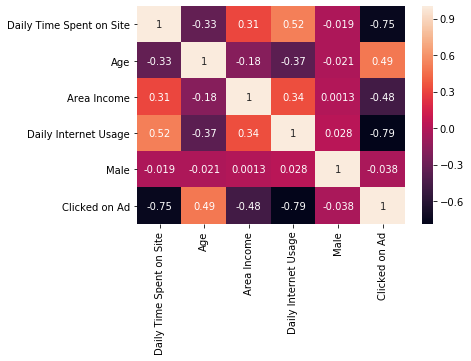

<Figure size 2520x1800 with 0 Axes>

In [13]:
ax=sns.heatmap(data_corr.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim((bottom+0.5), (top-0.5))
plt.figure(figsize=(35,25))

In [ ]:
data.columns

[Text(0.5, 1.0, 'Proportion of people clicked as per month')]

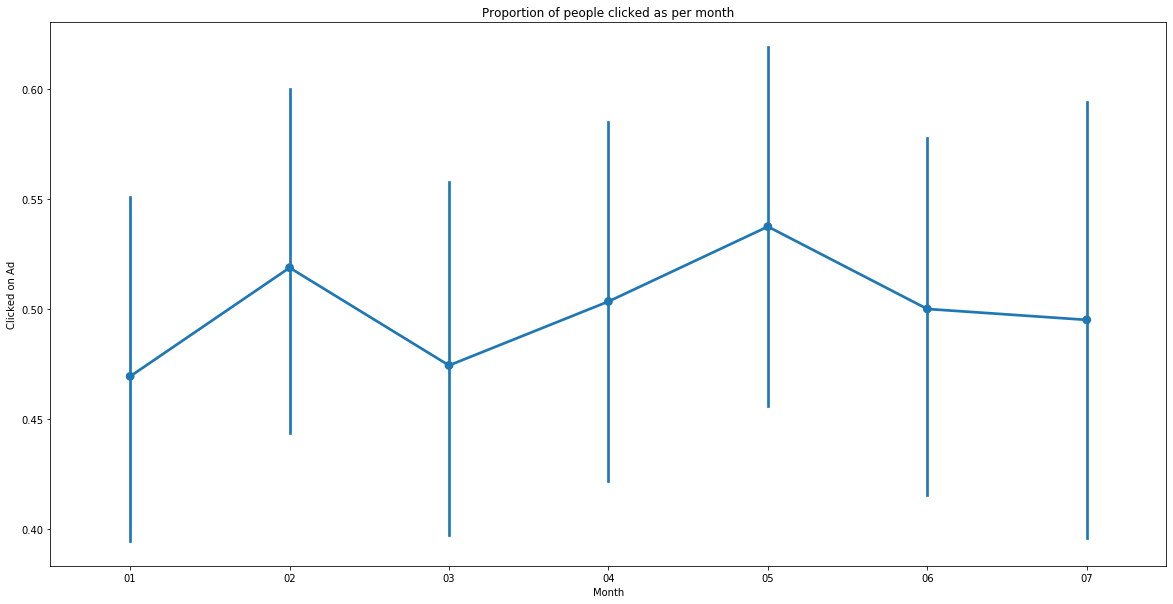

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='Month', y='Clicked on Ad', ax=ax)
ax.set(title='Proportion of people clicked as per month')

[Text(0.5, 1.0, 'Proportion of people clicked as per month for each gender')]

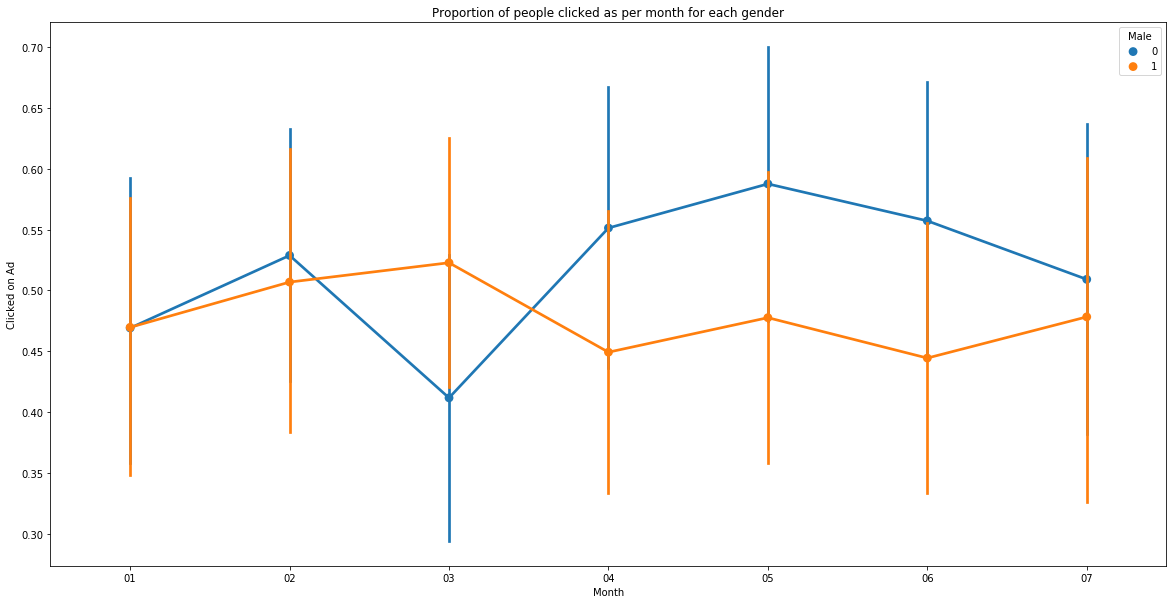

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='Month', y='Clicked on Ad',hue="Male", ax=ax)
ax.set(title='Proportion of people clicked as per month for each gender')

[Text(0.5, 1.0, 'Proportion of people clicked as per hour')]

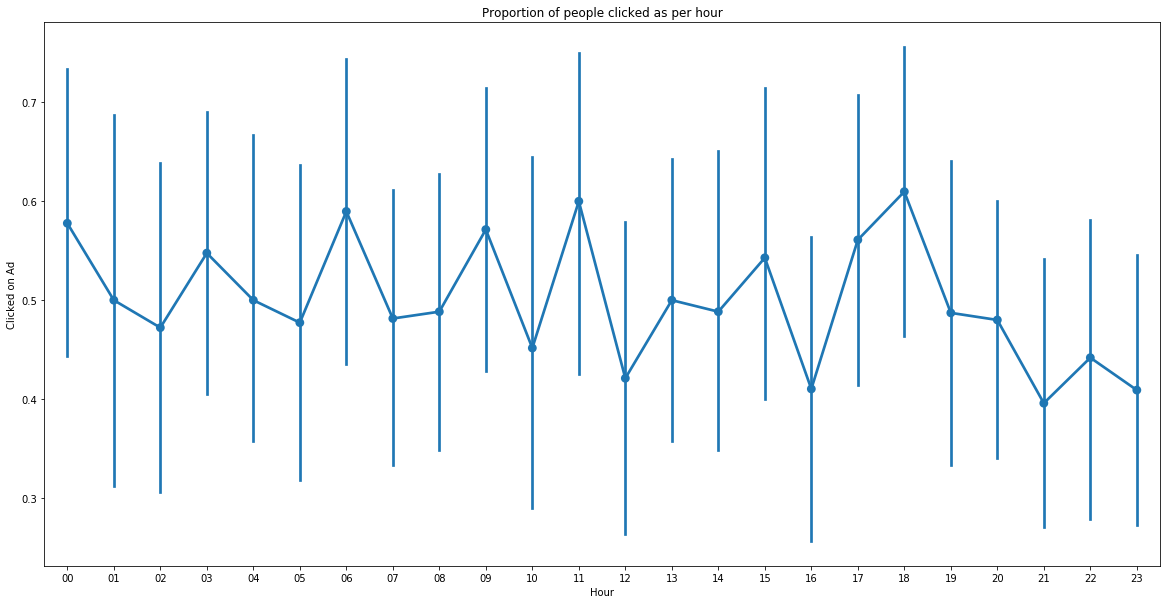

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='Hour', y='Clicked on Ad', ax=ax)
ax.set(title='Proportion of people clicked as per hour')

[Text(0.5, 1.0, 'Proportion of people clicked as per hour for each gender')]

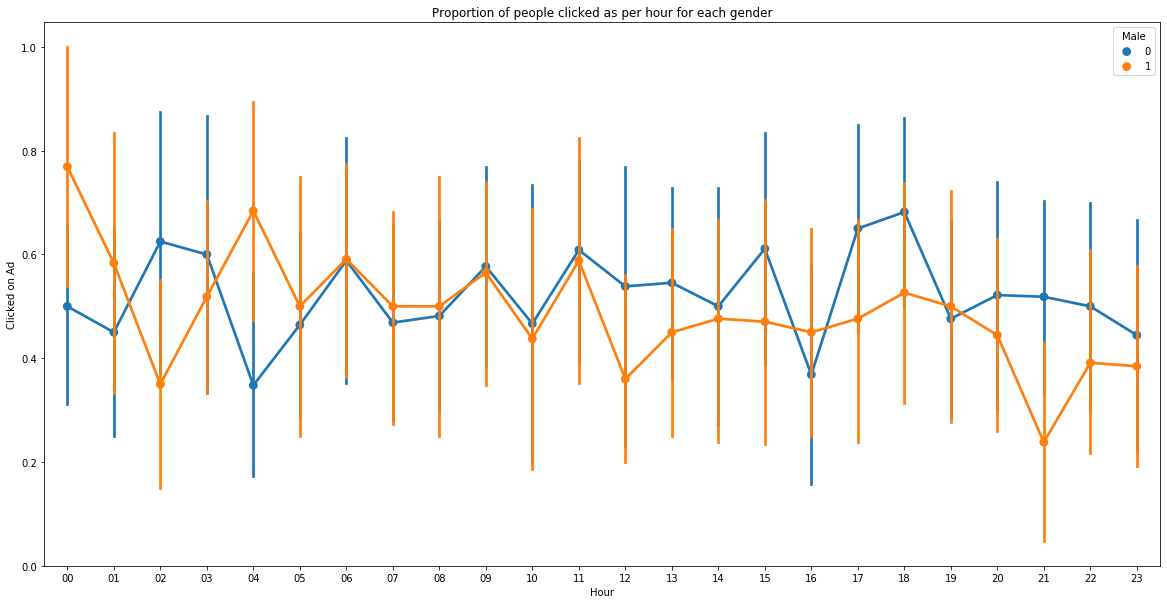

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='Hour', y='Clicked on Ad',hue='Male', ax=ax)
ax.set(title='Proportion of people clicked as per hour for each gender')

### Outlier detection and Treatment

In [16]:
num_features=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']

In [17]:
def z_score(data):
    count=0
    for i in data:
        z=np.abs((i-mean)/std)
        if z>3:
            count=count+1
    return count

In [18]:
for feature in num_features:
    mean =  np.mean(data[feature])
    std = np.std(data[feature])
    outliers = z_score(data[feature])
    print("Number of Outliers in "+ feature + " = " + str(outliers))

Number of Outliers in Daily Time Spent on Site = 0
Number of Outliers in Age = 0
Number of Outliers in Area Income = 3
Number of Outliers in Daily Internet Usage = 0


So, we have only 1 feature with outliers present. We will be removing these outliers from our dataset.

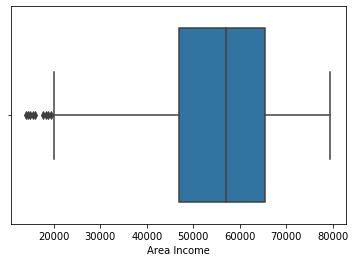

In [20]:
sns.boxplot(data['Area Income'])

In [21]:
#Outlier removal for "Area Income"
percentile25 = data['Area Income'].quantile(0.25)
percentile75 = data['Area Income'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
data=data[(data['Area Income']>lower_limit) & (data['Area Income']<upper_limit)]

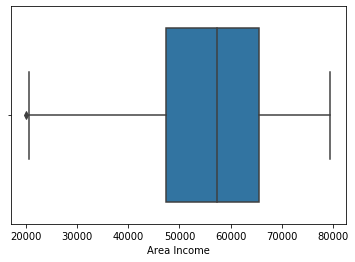

In [22]:
sns.boxplot(data['Area Income'])

### Training model

Now we can select our features and the target, and then split our data into test and train sets.

For our features, we have already decided to drop the 'Ad Topic Line' as it has unique texual data and at the moment we don't have more details about them. We can also drop the features for which we have created the numerical replacement features:

In [21]:
X = data.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

In [ ]:
X.head(3)

We can see that now all our features are numerical, and we can use them to train our model.

In [22]:
y = data['Clicked on Ad']

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Now that we have our train data, we want to train a logistic model on it:

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

F:\Anaconda\Anaconda_Inst\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
predictions = model.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [28]:
Accuracy= model.score(X_test,y_test)
Accuracy

0.94

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, predictions, target_names=['Not Clicked','Clicked']))

              precision    recall  f1-score   support

 Not Clicked       0.93      0.96      0.94       157
     Clicked       0.95      0.92      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model2 = RandomForestClassifier()

In [33]:
model2.fit(X_train, y_train)

RandomForestClassifier()

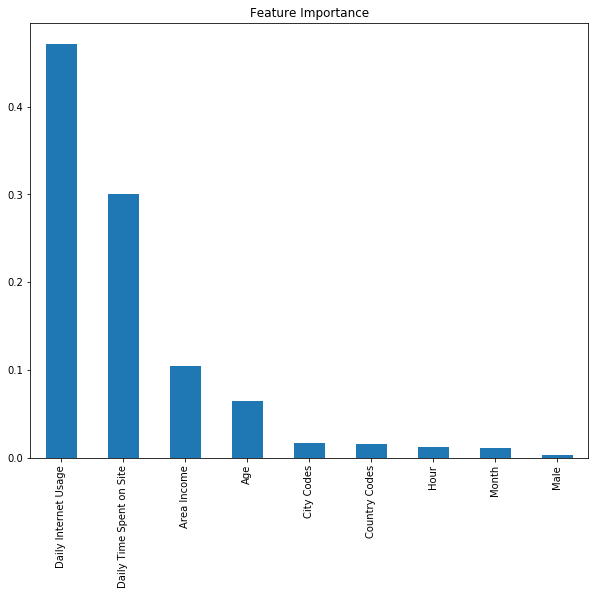

In [34]:
coef = pd.Series(model2.feature_importances_, X_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance",figsize=(10,8))

In [35]:
predictions = model2.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [36]:
Accuracy= model2.score(X_test,y_test)
Accuracy

0.9533333333333334

In [37]:
print(classification_report(y_test, predictions, target_names=['Not Clicked','Clicked']))

              precision    recall  f1-score   support

 Not Clicked       0.94      0.97      0.96       157
     Clicked       0.96      0.94      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

